In [1]:
from manim import *
from SvgMobject import MySvgMobject
from pprint import pprint
_RF = '-v WARNING --disable_caching -qm'
config.media_embed = True
config.media_width = '100%'

Manim Community v0.19.0

[RoundedRectangle,
 Circle,
 VMobjectFromSVGPath,
 Line,
 Circle,
 Line,
 Circle,
 Circle]


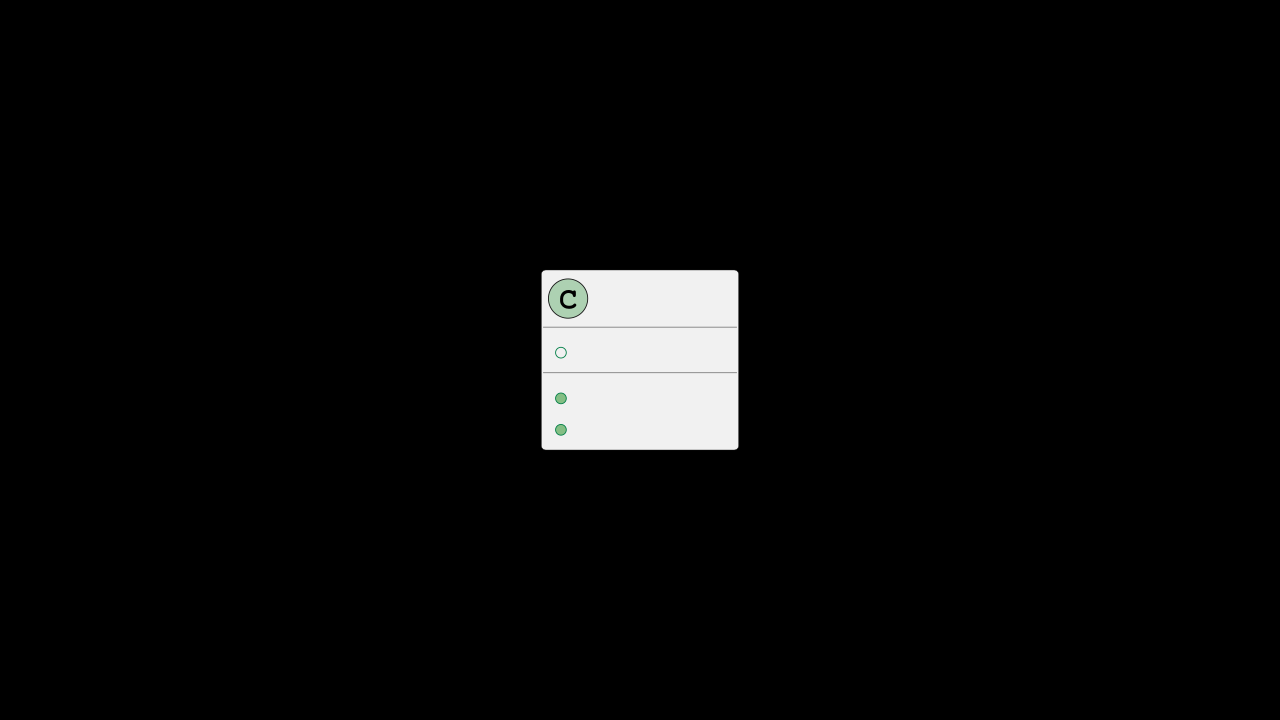

In [10]:
class Test(Scene):
    def setup(self):
        svg = SVGMobject(
            file_name=r".\out\test.svg",
        )
        pprint(svg.submobjects)
        # svg.generate_mobject()
        # pprint(svg[0].get_style())
        # svg[0].stretch_to_fit_height(5)
        # self.add(svg[0],svg)
        self.add(svg)
%manim $_RF Test

Manim Community v0.19.0

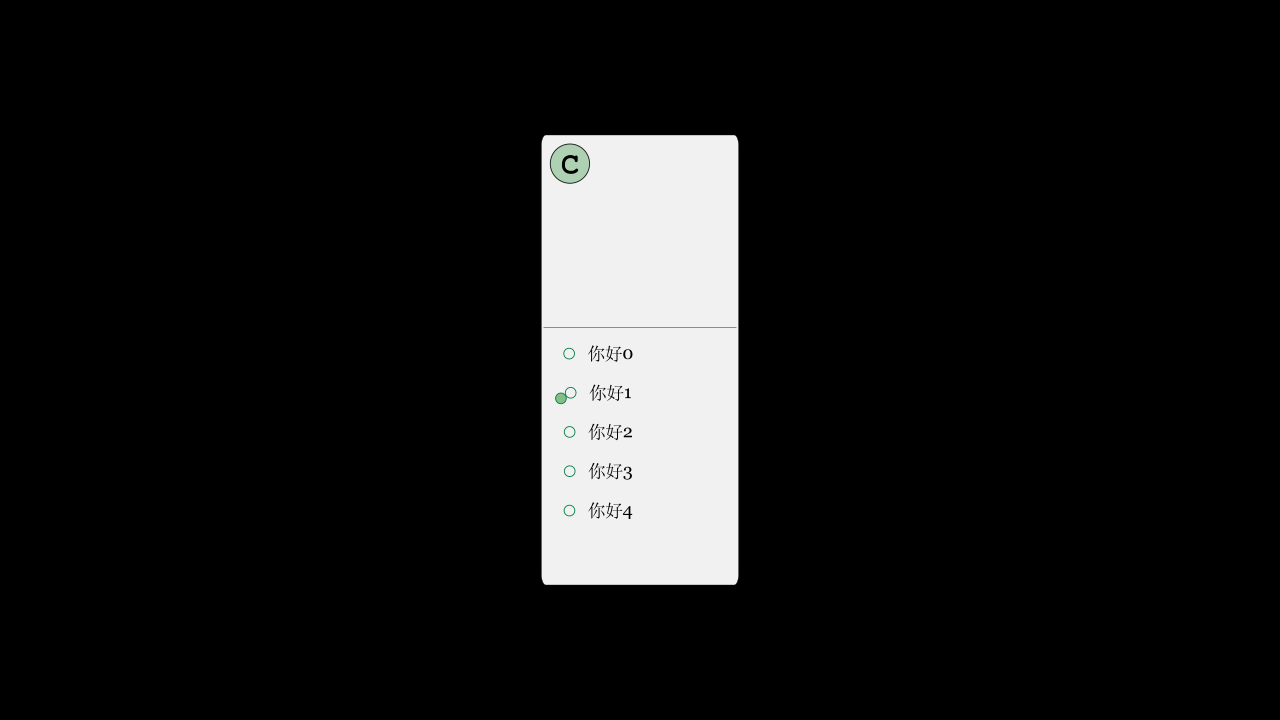

In [14]:
class Test(Scene):
    def construct(self):
        svg = SVGMobject(
            file_name=r'.\out\test.svg'
        )
        self.add(svg)

        rec = svg[0]
        cir = VGroup(svg[1],svg[2])
        line = svg[3]
        pra_cir = svg[4]
        me_cir = svg[6]
        # cir.shift(UP)
        cir.align_to(rec,UP,)
        cir.align_to(rec,LEFT,)
        cir.shift(RIGHT*0.1)
        cir.shift(DOWN*0.1)
        line.shift(DOWN)
        line.width = rec.width - 0.05
        # line.next_to(cir,DOWN,buff = 0.1,aligned_edge=LEFT)
        # line.move_to(rec.get_center())
        # line.move_to([rec.get_center()[0],cir.get_center()[1],0]+DOWN*cir.width/2+DOWN*0.1) 方法1

        line.next_to(cir,DOWN,buff = 0.1)# 方法2
        line.move_to([rec.get_center()[0],line.get_center()[1],0])
        
        # pra_cir.shift(RIGHT+DOWN)
        # pra_cir.next_to(line,DOWN,buff = 0.3)
        # pra_cir.align_to(cir,LEFT)
        # pra_cir.shift(RIGHT*0.1)

        # pra_cir2 = pra_cir.copy()
        # pra_cir2.move_to(pra_cir)
        # pra_cir2.shift(DOWN*0.4)

        # 想了想,几个小圆圈不重要,我们需要将这些内容整合成一个VGroup,然后整体arrange()就行,不需要一个一个地排列
        pra_cirs = VGroup()
        for i in range(5):
            pra_copy = pra_cir.copy()
            text = Text(f"你好{i}").scale(0.3).set_color(BLACK)
            text.next_to(pra_copy,RIGHT,buff = 0.15)
            grps = VGroup(pra_copy,text)
            pra_cirs.add(grps)
        pra_cirs.arrange(DOWN)
        pra_cirs.next_to(cir,DOWN,buff = 0.3)
        pra_cirs.align_to(cir,LEFT)
        pra_cirs.shift(RIGHT*0.15)

        rec.stretch_to_fit_height(5)
        cir.align_to(rec,UP,)
        cir.align_to(rec,LEFT,)
        cir.shift(RIGHT*0.1)
        cir.shift(DOWN*0.1)
        self.add(rec,cir,line,pra_cirs,me_cir)
%manim $_RF Test

In [15]:
# 我觉得还是拆解一下细节

# 脑海中想的效果是rec跟随者文本增添而增添,不是一上来固定长度
# 所以需要一个初始化rec的方式,只是增添一个圆和Line
# 另外还需要一个添加文本的方式,标题、内容,分开些吧.
# 同时获取对应长度,方便设置长方形宽度
# 关于文本的高度,也需要获取
# 区分一下参数和方法,参数结束后,需要添加line

# 整体上似乎也就是这样.


Manim Community v0.19.0

-0.7619721089656553


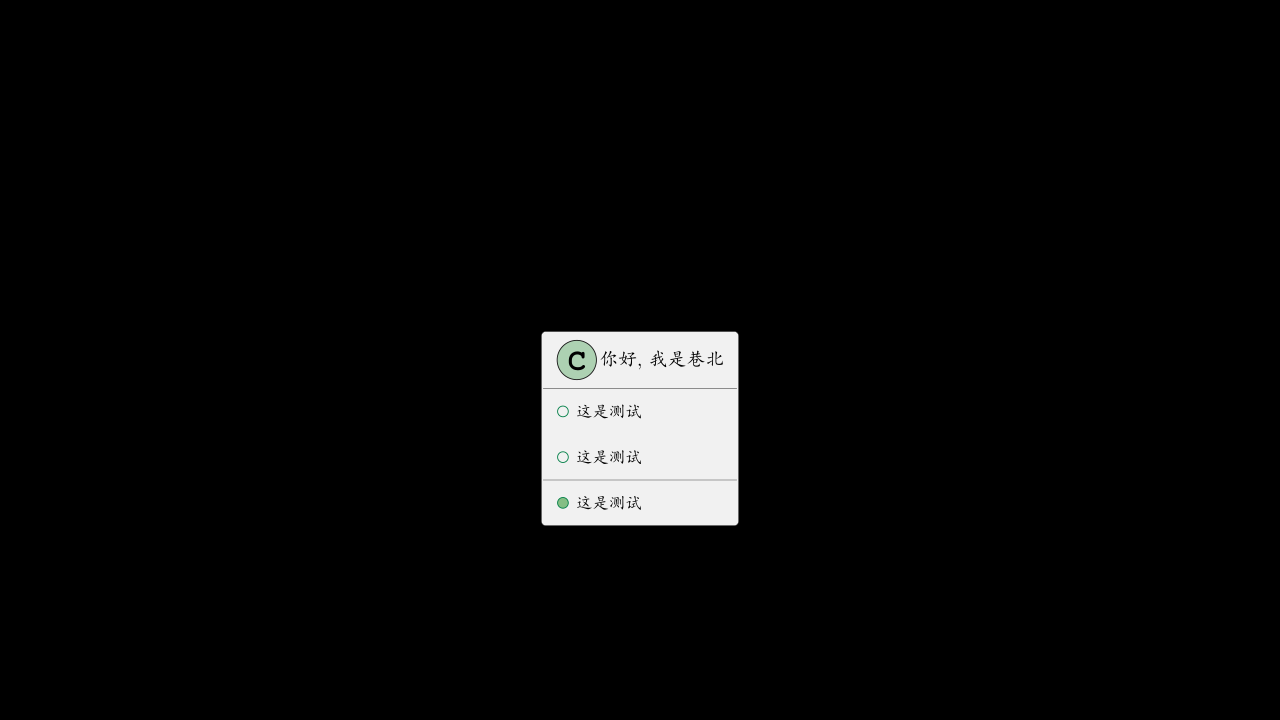

In [16]:
class Test(Scene):
    def construct(self):
        svg = SVGMobject(
            r".\out\test.svg"
        )
        rec = svg[0]
        cir = VGroup(svg[1],svg[2])
        line = svg[3]
        pra_cir = svg[4]
        me_cir = svg[6]
        

        # 设计间隔宽度
        cir_dis = np.linalg.norm(svg[3].get_center() - svg[5].get_center())

        # 设计初始化
        # buff = 0.1
        
        dis = np.linalg.norm(rec.get_top() - line.get_center())
        rec.stretch_to_fit_height(dis)
        line.next_to(rec, UP, buff = - dis)
        text = Tex("你好,我是巷北",tex_template = TexTemplateLibrary().ctex).scale(0.4).set_color(BLACK)
        cir_text = VGroup(cir, text).arrange(RIGHT,buff = 0.05)
        cir_text.move_to(rec.get_center())
        # cir_text.shift(UP*buff/2)

        # 记录rec的总长度
        total_dis = np.linalg.norm(rec.get_top() - rec.get_bottom())

        # 每添加一个小圆,rec总长度就变化一下
        total_dis += cir_dis 
        total_dis += cir_dis 
        total_dis += cir_dis  
        # total_dis += cir_dis 

        # 增添详细内容
        origin_rec = rec.get_top()
        rec_copy = rec.copy().stretch_to_fit_height(total_dis)
        stretch_rec = rec_copy.get_top()
        ori_str_dis = np.linalg.norm(origin_rec - stretch_rec)
        rec.stretch_to_fit_height(total_dis)
        rec.shift(DOWN*ori_str_dis)

        # 设计小圆圈与文本
        pra_cir_copy = pra_cir.copy()
        pra_cir_text = Tex("这是测试",tex_template = TexTemplateLibrary().ctex).scale(0.35).set_color(BLACK) 
        # 下面注释的这个方法是不太好的因为以cir为参考,会存在问题
        # pra_cir_copy.move_to(rec.get_center()+[cir.get_center()[0], -(cir_dis+buff)/2, 0])
        # 这个可以视为设置第一个点的方式
        pra_cir_copy.next_to(rec,LEFT,buff = - 0.3)
        pra_cir_copy.move_to([pra_cir_copy.get_center()[0],line.get_center()[1] - cir_dis/2, 0])
        pra_cir_text.next_to(pra_cir_copy,RIGHT, buff = 0.1)
        pra_cir_grps = VGroup(pra_cir_copy,pra_cir_text)
        # 下面是设计第二个点的方式
        pra_cir_copy2 = pra_cir.copy()
        pra_cir_text2 = pra_cir_text.copy()
        pra_cir_copy2.move_to(pra_cir_copy)
        pra_cir_copy2.shift(DOWN*cir_dis)
        pra_cir_text2.next_to(pra_cir_copy2,RIGHT, buff = 0.1)
        pra_cir_grps2 = VGroup(pra_cir_copy2, pra_cir_text2)

        # 如果有方法进来,那么我们需要添加线
        method_line = line.copy()
        method_line.move_to([rec.get_center()[0], pra_cir_copy2.get_center()[1] - cir_dis /2, 0])
        # method_line.shift(UP*buff)

        # 添加方法圆圈
        me_cir_copy = me_cir.copy()
        me_cir_text = pra_cir_text.copy()
        
        me_cir_copy.next_to(rec,LEFT, buff = -0.3)
        me_cir_copy.move_to([me_cir_copy.get_center()[0], method_line.get_center()[1] - cir_dis /2, 0])
        me_cir_text.next_to(me_cir_copy, RIGHT, buff = 0.1)
        me_cir_grps = VGroup(me_cir_copy, me_cir_text)
        print(rec.get_center()[1])
        self.add(rec) 
        self.add(line)
        self.add(cir_text)

        self.add(pra_cir_grps)
        self.add(pra_cir_grps2)
        self.add(method_line)

        self.add(me_cir_grps)
%manim $_RF Test

In [18]:
# 自动变换算法
class StretchRectangle(Scene):
    def construct(self):
        # 创建长方形
        rect = Rectangle(width=4, height=2, color=BLUE)
        # self.add(rect)

        # 获取长方形的原始位置
        original_position = rect.get_top()
        rect_copy = rect.copy().stretch_to_fit_height(4)
        move_position = rect_copy.get_top()

        self.play(rect.animate.stretch_to_fit_height(4).shift(DOWN*(np.linalg.norm(original_position - move_position))),run_time = 3)

        self.wait()
%manim $_RF StretchRectangle


Manim Community v0.19.0

Manim Community v0.19.0

[[ 2.  2.  0.]
 [-2.  2.  0.]
 [-2. -2.  0.]
 [ 2. -2.  0.]]


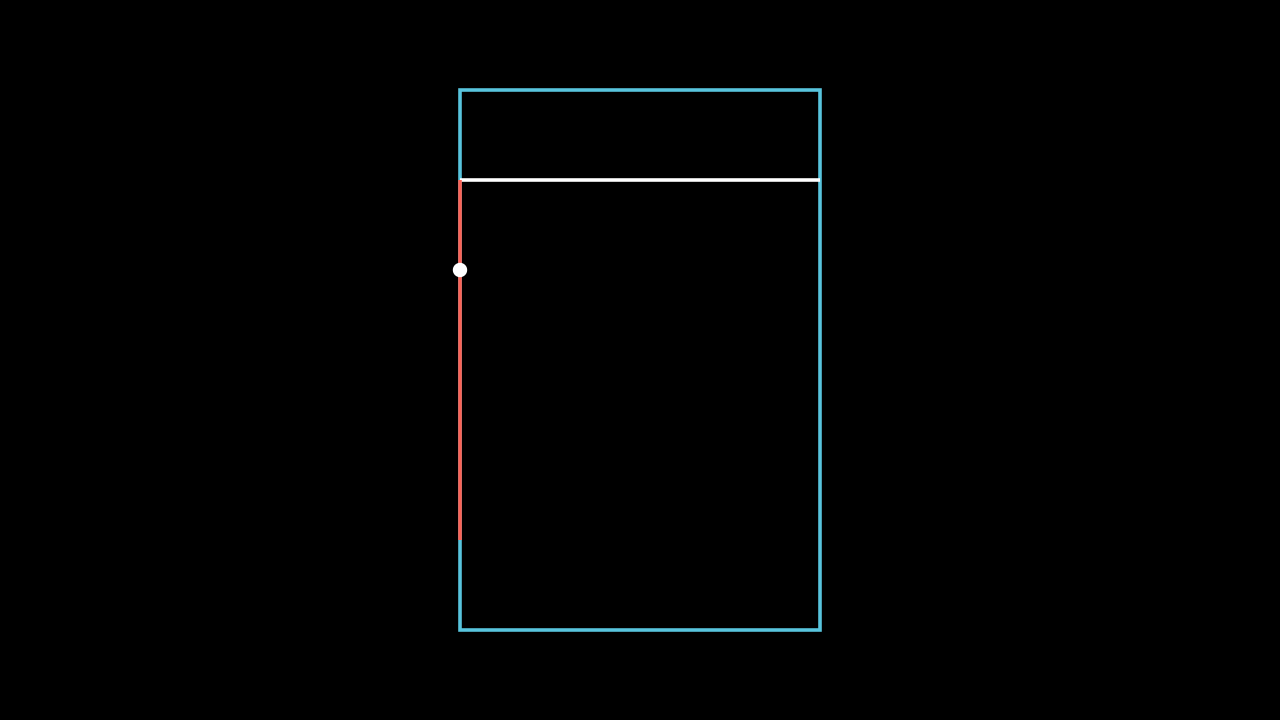

In [18]:
# 还有个问题是line会因rec的拉伸而改变位置，所以需要想一种方式，line能一直挨着rec

class Test(Scene):
    def construct(self):
        rec = Rectangle().set_color(BLUE)
        line = Line(rec.get_left(),rec.get_right())
        rec.stretch_to_fit_height(4)
        print(rec.get_vertices())
        rec_line = Line(rec.get_vertices()[1],rec.get_vertices()[2]).set_color(RED)
        dot = Dot(rec_line.point_from_proportion(0.25))
        rec.stretch_to_fit_height(6)
        line.next_to(rec,UP,buff = -1)
        self.add(rec, line, rec_line,dot)
%manim $_RF Test

Manim Community v0.19.0

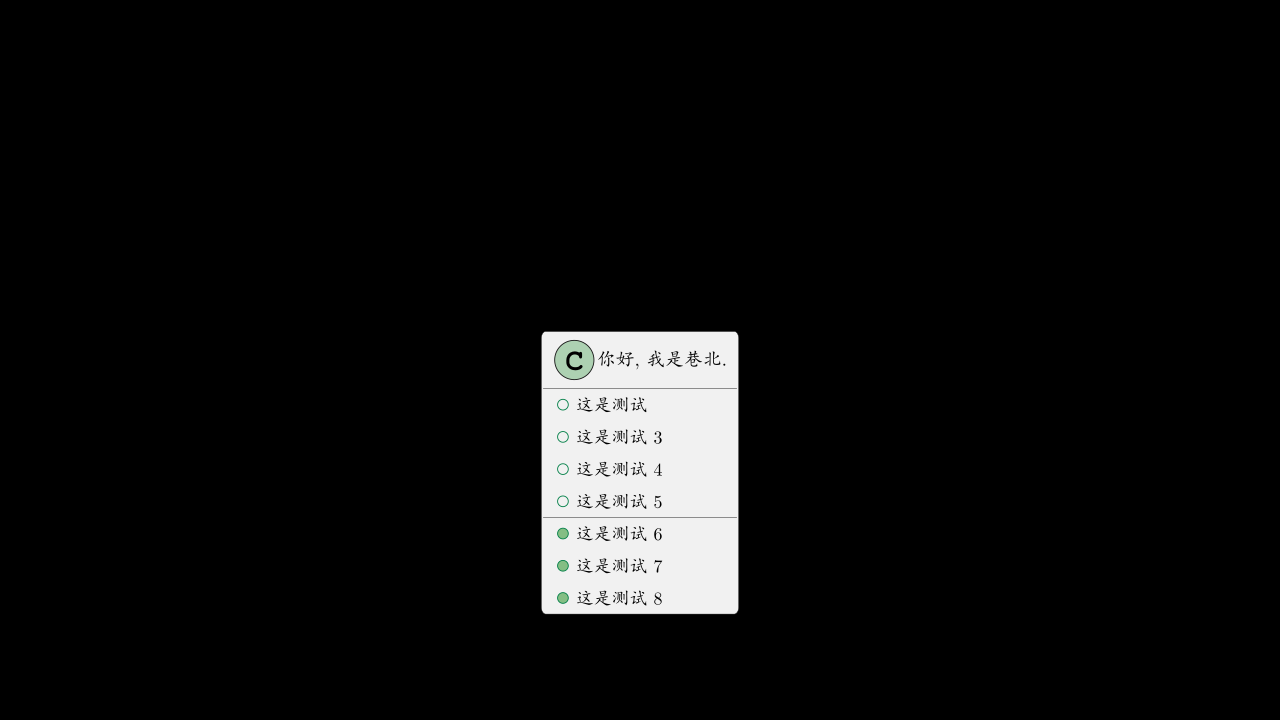

In [ ]:
class Test(Scene):
    def construct(self):
        svg = SVGMobject(r".\out\test.svg")
        cell = MySvgMobject(svg = svg, title = "你好,我是巷北.")

        cell.add_information(text = "这是测试",)
        cell.add_information(text = '这是测试3',first_mob=MySvgMobject.pre_mob.pop())
        cell.add_information(text = '这是测试4',first_mob=MySvgMobject.pre_mob.pop())
        cell.add_information(text = '这是测试5',first_mob=MySvgMobject.pre_mob.pop(),islast=True)
        cell.add_information(text = '这是测试6',ismethod=True)
        cell.add_information(text = '这是测试7', ismethod=True,first_mob=MySvgMobject.pre_mob.pop())
        cell.add_information(text = '这是测试8', ismethod=True,first_mob=MySvgMobject.pre_mob.pop())
        
        self.add(cell)
%manim $_RF Test

Manim Community v0.19.0

[Rectangle]


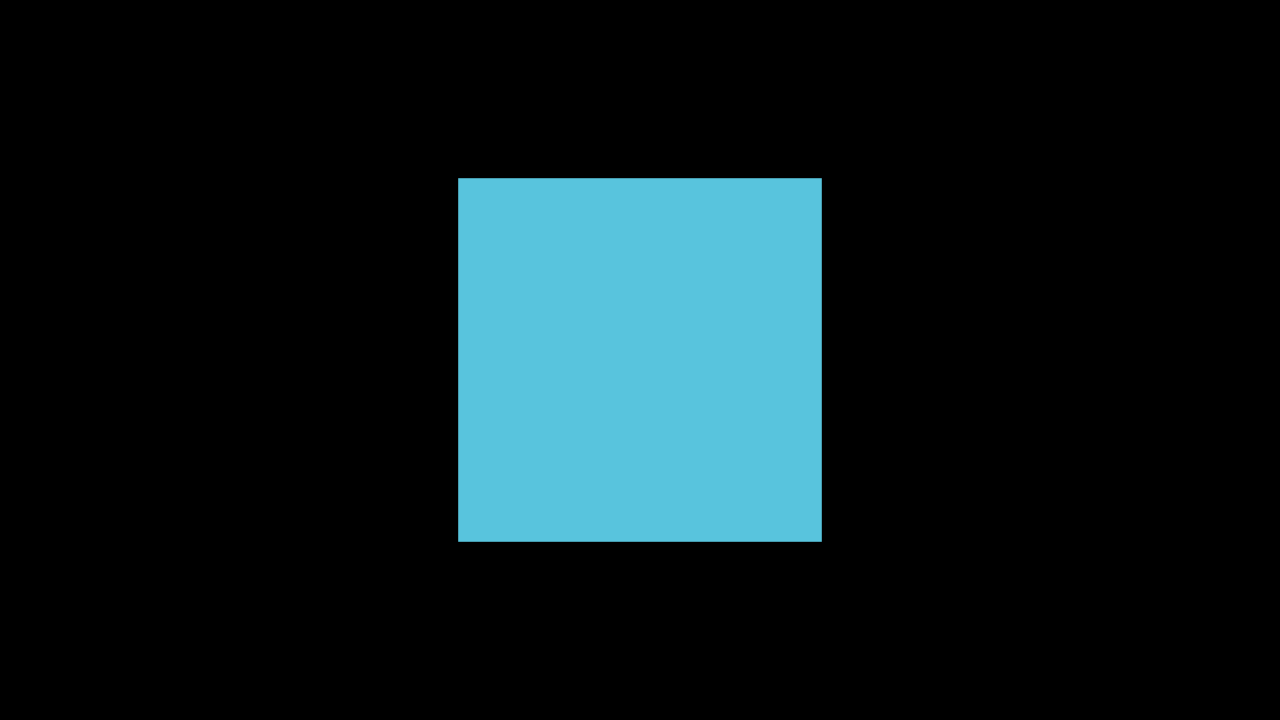

In [20]:
class Test(Scene):
    def construct(self):
        rec = Rectangle(fill_opacity = 1).set_color(BLUE)
        self.add(rec)
        rec.stretch_to_fit_height(4)
        self.add(rec)
        print(self.mobjects)
%manim $_RF Test